####Here, I have Compared multiple models like **ARIMA**, **SARIMA**, **LSTM**, **Random** **Forest**, and **SVM** with **RBF** **Kernel** for stock price prediction (time series forecasting techniques). Below, I have implement these models, comparing their performance, and presenting the results using meaningful metrics like **Mean** **Squared** **Error** (MSE), **Mean** **Absolute** **Error** (MAE), and **R**-**squared** (R²).

##Fetch and Preprocess Data

In [35]:
# CODE for pulling the stock market data

import requests
from datetime import datetime

def get_stock_history(symbol, api_key):
    """
    Fetch historical stock data using Alpha Vantage API

    Parameters:
    symbol (str): Stock symbol (e.g., 'AAPL')
    api_key (str): Your Alpha Vantage API key

    Returns:
    pandas.DataFrame: Historical stock data
    """
    # API endpoint
    base_url = "https://www.alphavantage.co/query"

    # Parameters for API request
    params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": symbol,
        "outputsize": "full",  # 'full' for 20+ years of data, 'compact' for last 100 days
        "apikey": api_key
    }

    try:
        # Make API request
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Raise exception for bad status codes

        # Parse JSON response
        data = response.json()

        # Check for error messages
        if "Error Message" in data:
            raise ValueError(f"API Error: {data['Error Message']}")

        # Extract time series data
        time_series = data.get("Time Series (Daily)")
        if not time_series:
            raise ValueError("No time series data found in response")

        # Convert to DataFrame
        df = pd.DataFrame.from_dict(time_series, orient='index')

        # Clean up column names
        df.columns = [col.split('. ')[1] for col in df.columns]

        # Convert string values to float
        for col in df.columns:
            df[col] = pd.to_numeric(df[col])

        return df.reset_index()

    except requests.exceptions.RequestException as e:
        print(f"Network error occurred: {e}")
        return None
    except Exception as e:
        print(f"Error processing data: {e}")
        return None

# init API KEY
API_KEY = 'S4KBU8M7LJJLBZAM'

[*********************100%***********************]  1 of 1 completed

Price           Close
Ticker           AAPL
Date                 
2015-01-02  24.320431
2015-01-05  23.635286
2015-01-06  23.637510
2015-01-07  23.968956
2015-01-08  24.889902


In [ ]:
import pandas as pd
stock_data = get_stock_history("AAPL", API_KEY)
stock_data.head()

 ### Preprocess the Data
 I have used the **Closing** **Price** as the **target** variable and create features like **Moving** **Averages** and Price Changes.

In [34]:
# # Use the 'Close' column as the target variable
# data['Target'] = data['Close'].shift(-1)  # Predict the next day's closing price

# # Drop rows with NaN values (created by shifting)
# data.dropna(inplace=True)

# # Create features (e.g., Moving Averages, Price Changes)
# data['SMA_10'] = data['Close'].rolling(window=10).mean()  # 10-day Simple Moving Average
# data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
# data['Price_Change'] = data['Close'].pct_change()  # Daily price change

# # Drop rows with NaN values (created by rolling and pct_change)
# data.dropna(inplace=True)

# # Define features (X) and target (y)
# X = data[['Close', 'SMA_10', 'SMA_50', 'Price_Change']]
# y = data['Target']

# # Display the first few rows of the features
# X.head()

NameError: name 'data1' is not defined

In [36]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Separate features (X) and target (y)
y_train, y_test = train_data['Close'], test_data['Close']

In [24]:
X.shape


(2151, 4)

### Split Data into Training and Testing Sets

### Implementation and Comparison of different Models

1.  **ARIMA** (AutoRegressive Integrated Moving Average: **ARIMA** is a classic time series forecasting model.

In [37]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fit ARIMA model
arima_model = ARIMA(y_train, order=(5, 1, 0))  # (p, d, q)
arima_fit = arima_model.fit()

# Make predictions
arima_predictions = arima_fit.forecast(steps=len(y_test))

# Evaluate ARIMA
arima_mse = mean_squared_error(y_test, arima_predictions)
arima_mae = mean_absolute_error(y_test, arima_predictions)
arima_r2 = r2_score(y_test, arima_predictions)

print(f"ARIMA - MSE: {arima_mse}, MAE: {arima_mae}, R²: {arima_r2}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA - MSE: 582.7539180298072, MAE: 20.038041880432605, R²: -1.131593167973592


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2. SARIMA (Seasonal ARIMA)

SARIMA extends ARIMA to handle seasonality.

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
sarima_model = SARIMAX(y_train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Make predictions
sarima_predictions = sarima_fit.forecast(steps=len(y_test))

# Evaluate SARIMA
sarima_mse = mean_squared_error(y_test, sarima_predictions)
sarima_mae = mean_absolute_error(y_test, sarima_predictions)
sarima_r2 = r2_score(y_test, sarima_predictions)

print(f"SARIMA - MSE: {sarima_mse}, MAE: {sarima_mae}, R²: {sarima_r2}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA - MSE: 2287.792449811986, MAE: 44.25533760333549, R²: -7.368271074432075


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### LSTM (Long Short-Term Memory)

LSTM is a deep learning model for sequence prediction.

In [39]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Separate features (X) and target (y)
y_train, y_test = train_data['Close'], test_data['Close']

# Scale the data
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data)
scaled_test = scaler.transform(test_data)

# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(scaled_train, seq_length)
X_test, y_test = create_sequences(scaled_test, seq_length)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(1))

# Compile and train
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Evaluate LSTM
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_r2 = r2_score(y_test, lstm_predictions)

print(f"LSTM - MSE: {lstm_mse}, MAE: {lstm_mae}, R²: {lstm_r2}")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0206
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 4.6655e-04
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.5469e-04
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 3.8104e-04
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 3.6330e-04
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 3.4565e-04
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 3.3795e-04
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.0733e-04
Epoch 9/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.7127e-04
Epoch 10/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.7789e-04
Epoch 11/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.6543e-04
Epoch 12/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 3.9289e-04
Epoch 13/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.3499e-04
Epoch 14/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 2.1885e-04
Epoch 15/20
54/54 ━━━━━━━━━━━━

### Random Forest

Random Forest is a tree-based ensemble model.

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Prepare features (using lagged values)
train_data['Lag1'] = train_data['Close'].shift(1)
test_data['Lag1'] = test_data['Close'].shift(1)
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

X_train, X_test = train_data[['Lag1']], test_data[['Lag1']]
y_train, y_test = train_data['Close'], test_data['Close']

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest - MSE: {rf_mse}, MAE: {rf_mae}, R²: {rf_r2}")

<ipython-input-40-9420c91540ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Lag1'] = train_data['Close'].shift(1)
<ipython-input-40-9420c91540ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Lag1'] = test_data['Close'].shift(1)
<ipython-input-40-9420c91540ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

Random Forest - MSE: 28.48458372638469, MAE: 3.7381496916857606, R²: 0.8957815244958811


#### SVM with RBF Kernel

In [41]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVR(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluate SVM
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)

print(f"SVM (RBF Kernel) - MSE: {svm_mse}, MAE: {svm_mae}, R²: {svm_r2}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM (RBF Kernel) - MSE: 874.2518624513016, MAE: 20.527997572495796, R²: -2.198684494971747


### Compare Models
A comparison table to summarize the results.

In [42]:
import pandas as pd

# Create a comparison table
results = {
    'Model': ['ARIMA', 'SARIMA', 'LSTM', 'Random Forest', 'SVM (RBF Kernel)'],
    'MSE': [arima_mse, sarima_mse, lstm_mse, rf_mse, svm_mse],
    'MAE': [arima_mae, sarima_mae, lstm_mae, rf_mae, svm_mae],
    'R²': [arima_r2, sarima_r2, lstm_r2, rf_r2, svm_r2]
}

results_df = pd.DataFrame(results)
print(results_df)

              Model           MSE         MAE            R²
0             ARIMA    582.753918   20.038042 -1.131593e+00
1            SARIMA   2287.792450   44.255338 -7.368271e+00
2              LSTM  23808.676231  153.466408 -1.934099e+06
3     Random Forest     28.484584    3.738150  8.957815e-01
4  SVM (RBF Kernel)    874.251862   20.527998 -2.198684e+00


### Visualize Results
Plot the actual vs. predicted prices for each model.

ValueError: x and y must have same first dimension, but have shapes (440,) and (441,)

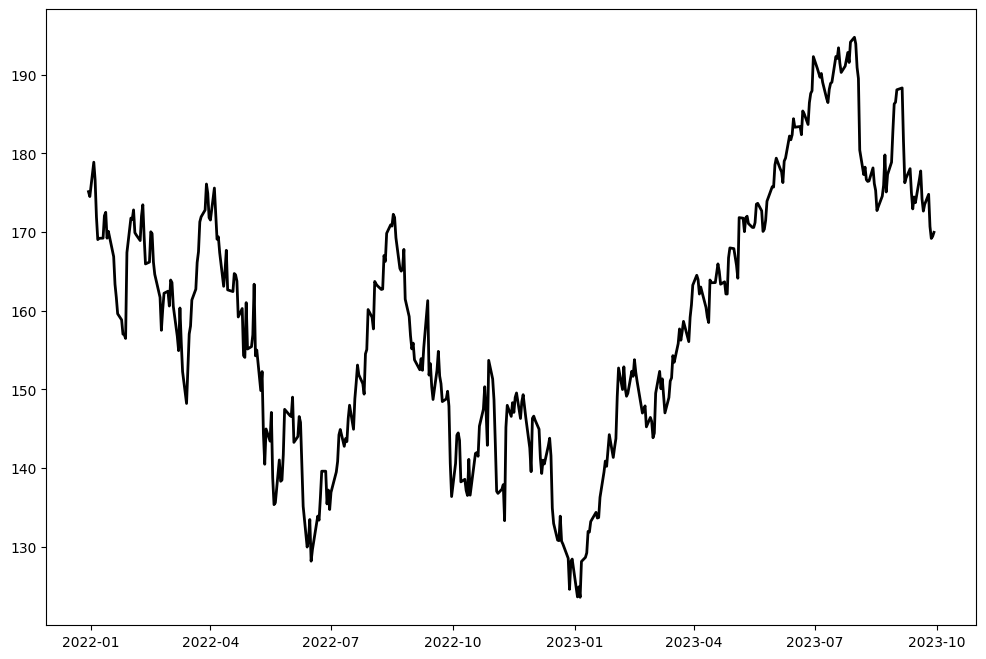

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(y_test.index, y_test, label='Actual Prices', color='black', linewidth=2)

# Plot predictions
plt.plot(y_test.index, arima_predictions, label='ARIMA Predictions', linestyle='--')
plt.plot(y_test.index, sarima_predictions, label='SARIMA Predictions', linestyle='--')
plt.plot(y_test.index, lstm_predictions, label='LSTM Predictions', linestyle='--')
plt.plot(y_test.index, rf_predictions, label='Random Forest Predictions', linestyle='--')
plt.plot(y_test.index, svm_predictions, label='SVM Predictions', linestyle='--')

plt.title('Stock Price Prediction - Model Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

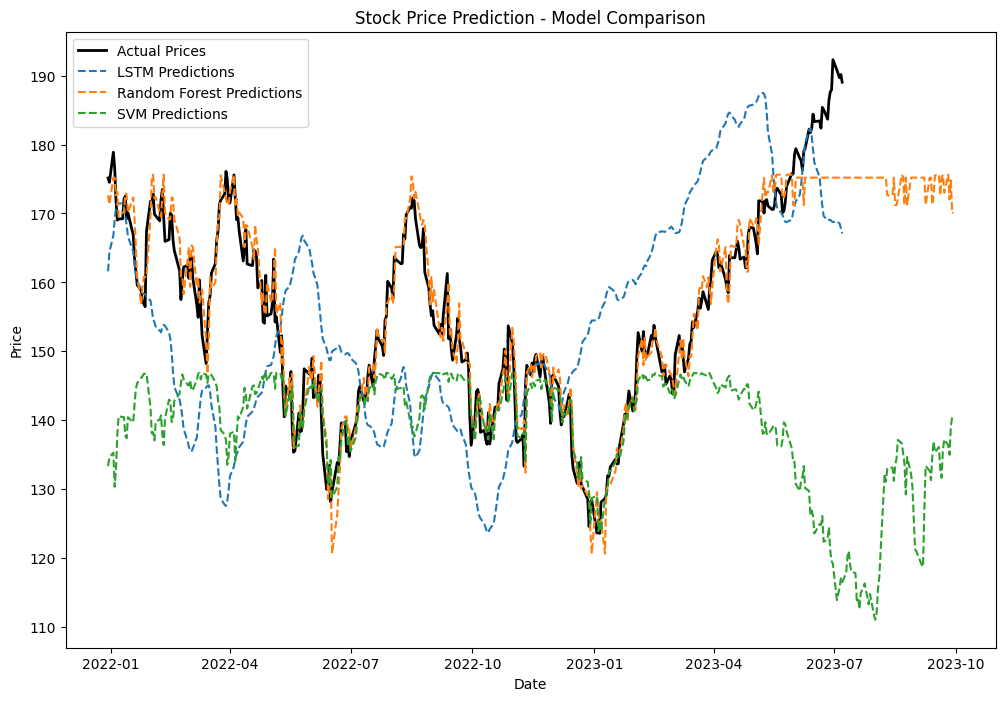

In [44]:
import matplotlib.pyplot as plt

# Assuming 'y_test' is a pandas Series or DataFrame with a DatetimeIndex
plt.figure(figsize=(12, 8))
plt.plot(y_test.index[:len(lstm_predictions)], y_test[:len(lstm_predictions)], label='Actual Prices', color='black', linewidth=2)

# Plot predictions (adjusted for LSTM predictions length)
plt.plot(y_test.index[:len(lstm_predictions)], lstm_predictions.flatten(), label='LSTM Predictions', linestyle='--')  # Changed here
plt.plot(y_test.index[:len(rf_predictions)], rf_predictions, label='Random Forest Predictions', linestyle='--')
plt.plot(y_test.index[:len(svm_predictions)], svm_predictions, label='SVM Predictions', linestyle='--')

plt.title('Stock Price Prediction - Model Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()